In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('QVI_purchase_behaviour.csv')
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [8]:
df1=pd.read_excel('QVI_transaction_data.xlsx')
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [15]:
df.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [12]:
df['PREMIUM_CUSTOMER'].value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

In [13]:
df['LIFESTAGE'].value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

In [17]:
# Check for missing values
missing_values_df1 = df1.isnull().sum()
print("Missing Values:")
print(missing_values_df1)

Missing Values:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [18]:
df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [19]:
# Check for outliers in PROD_QTY and TOT_SALES
outliers = df1[['PROD_QTY', 'TOT_SALES']].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("\nOutliers:")
print(outliers)


Outliers:
            PROD_QTY      TOT_SALES
count  264836.000000  264836.000000
mean        1.907309       7.304200
std         0.643654       3.083226
min         1.000000       1.500000
25%         2.000000       5.400000
50%         2.000000       7.400000
75%         2.000000       9.200000
90%         2.000000      10.800000
95%         2.000000      11.400000
99%         2.000000      13.000000
max       200.000000     650.000000


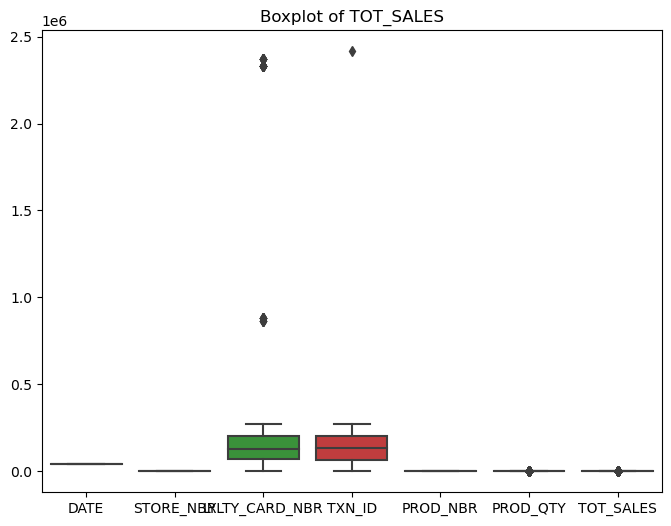

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for TOT_SALES
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1)
plt.title('Boxplot of TOT_SALES')
plt.show()


C:\Users\manus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


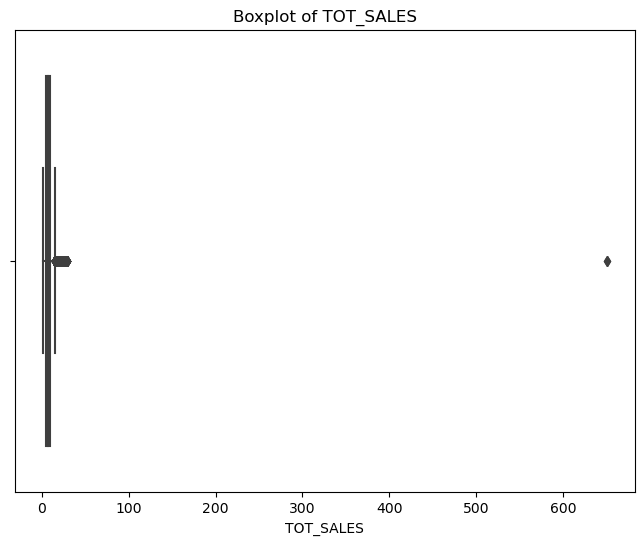

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(df1['TOT_SALES'])
plt.title('Boxplot of TOT_SALES')
plt.xlabel('TOT_SALES')
plt.show()

C:\Users\manus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


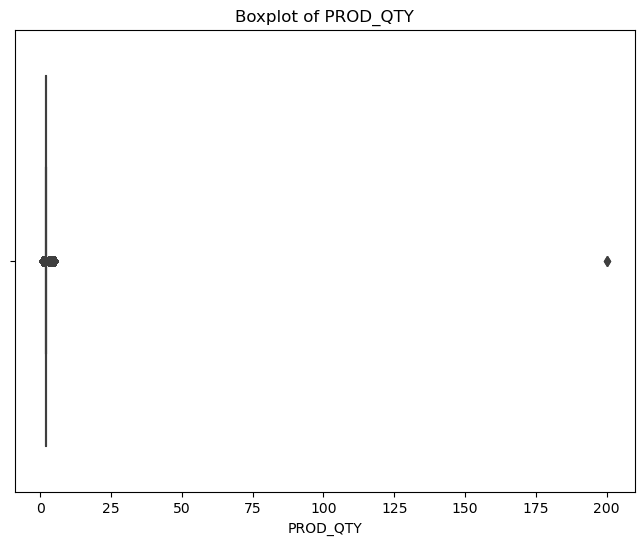

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(df1['PROD_QTY'])
plt.title('Boxplot of PROD_QTY')
plt.xlabel('PROD_QTY')
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

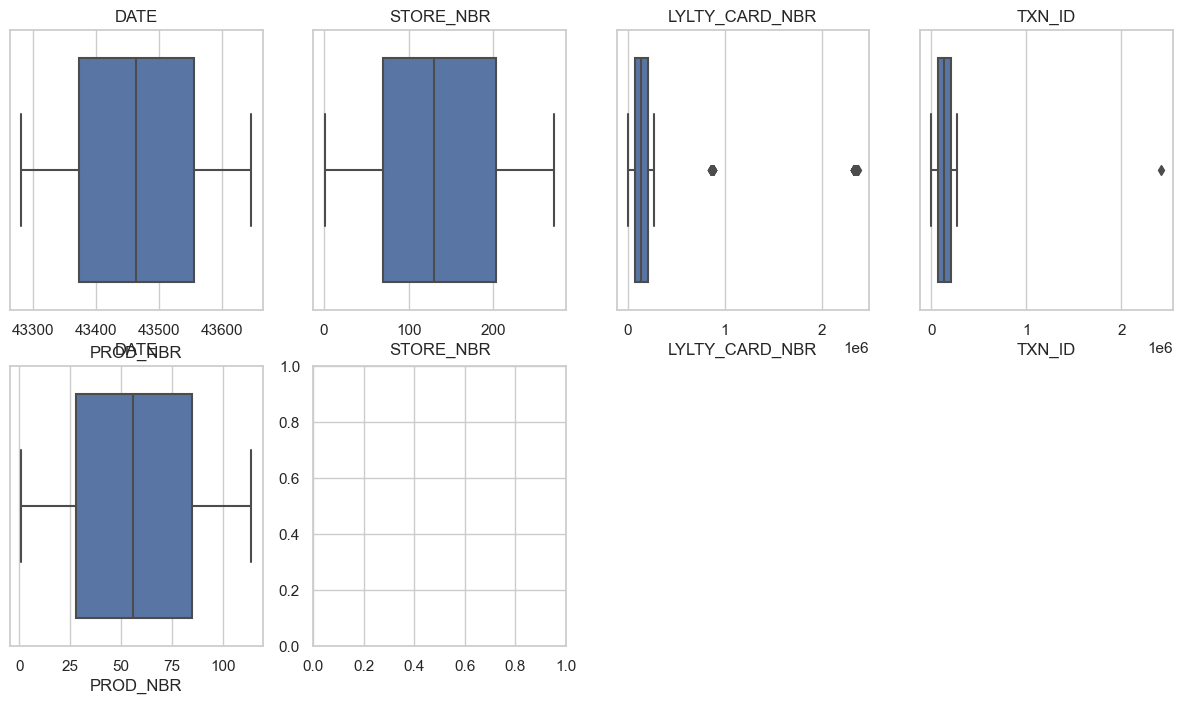

In [28]:
sns.set(style="whitegrid")

# Plot boxplots for each column in df1
plt.figure(figsize=(15, 8))  # Set the figure size

# Loop through each column and plot a boxplot
for i, column in enumerate(df1.columns):
    plt.subplot(2, 4, i + 1)  # Create subplots
    sns.boxplot(x=df1[column])  # Plot boxplot
    plt.title(column)  # Set title for each subplot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [30]:
df1


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [31]:
# Calculate Q1 (first quartile)
q1 = df1.quantile(0.25)

# Calculate Q3 (third quartile)
q3 = df1.quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Calculate lower bound
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [33]:
df2=df1.clip(lower_bound,upper_bound, axis=1)

C:\Users\manus\AppData\Local\Temp\ipykernel_16728\2461808944.py:1: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  df2=df1.clip(lower_bound,upper_bound, axis=1)


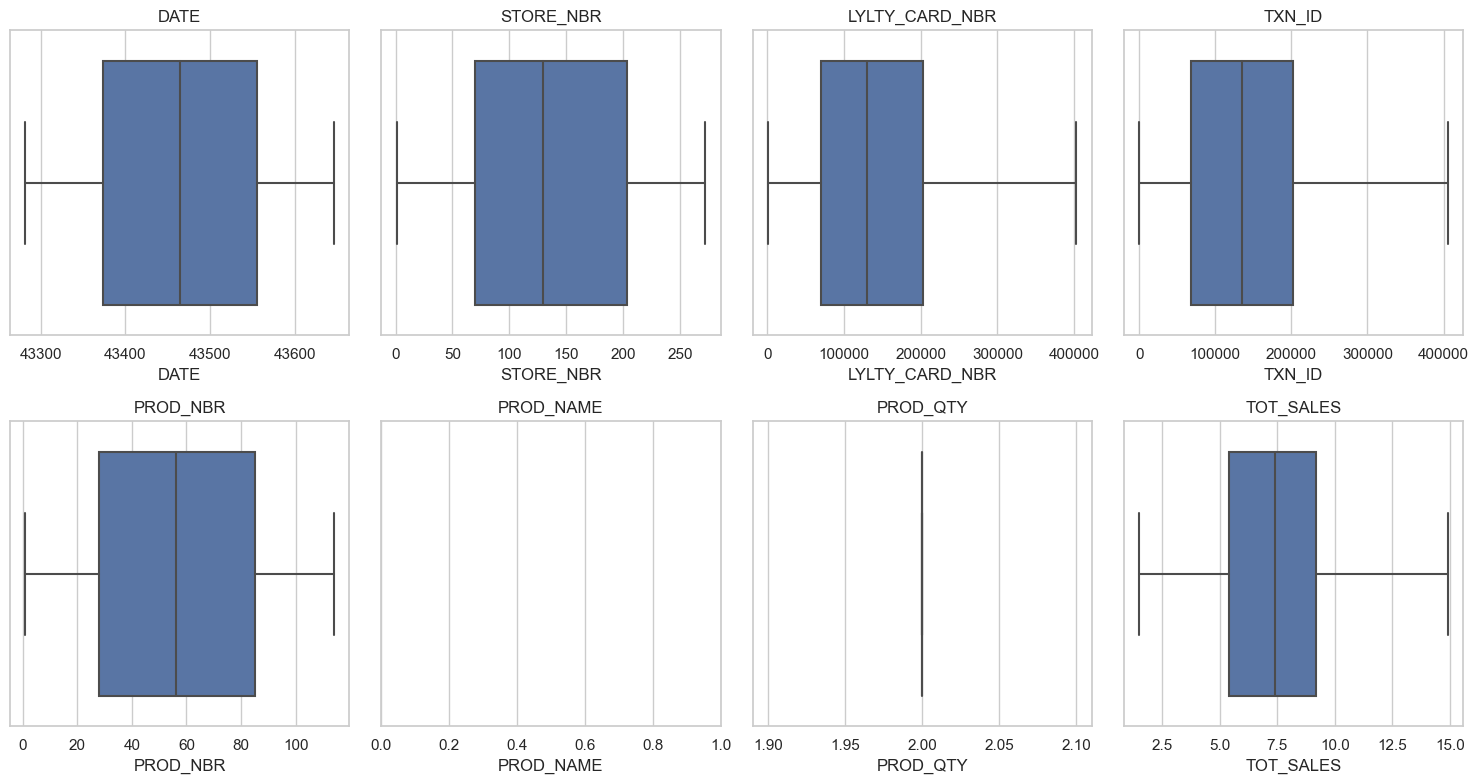

In [35]:
plt.figure(figsize=(15, 8))  # Set the figure size

# Loop through each column and plot a boxplot
for i, column in enumerate(df2.columns):
    plt.subplot(2, 4, i + 1)  # Create subplots
    sns.boxplot(x=df2[column])  # Plot boxplot
    plt.title(column)  # Set title for each subplot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plot

In [37]:
df2.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  float64
 3   TXN_ID          264836 non-null  float64
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       0 non-null       object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 16.2+ MB


In [39]:
df2['DATE'] = pd.to_datetime(df1['DATE'], unit='D', origin='1899-12-30')

In [40]:
df2['DATE'] 

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [41]:
print(df1['DATE'].unique())

['2018-10-17T00:00:00.000000000' '2019-05-14T00:00:00.000000000'
 '2019-05-20T00:00:00.000000000' '2018-08-17T00:00:00.000000000'
 '2018-08-18T00:00:00.000000000' '2019-05-19T00:00:00.000000000'
 '2019-05-16T00:00:00.000000000' '2018-08-20T00:00:00.000000000'
 '2019-05-17T00:00:00.000000000' '2019-05-18T00:00:00.000000000'
 '2019-05-15T00:00:00.000000000' '2018-08-14T00:00:00.000000000'
 '2018-08-16T00:00:00.000000000' '2018-08-19T00:00:00.000000000'
 '2018-08-15T00:00:00.000000000' '2019-06-17T00:00:00.000000000'
 '2018-09-05T00:00:00.000000000' '2018-09-27T00:00:00.000000000'
 '2019-02-27T00:00:00.000000000' '2019-03-19T00:00:00.000000000'
 '2019-06-16T00:00:00.000000000' '2018-11-25T00:00:00.000000000'
 '2018-11-10T00:00:00.000000000' '2019-03-09T00:00:00.000000000'
 '2018-11-01T00:00:00.000000000' '2019-03-13T00:00:00.000000000'
 '2019-04-06T00:00:00.000000000' '2018-07-30T00:00:00.000000000'
 '2018-10-18T00:00:00.000000000' '2018-11-05T00:00:00.000000000'
 '2019-03-04T00:00:00.000

In [42]:
numeric_cols = ['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES']
for col in numeric_cols:
    non_numeric_values = df2[~pd.to_numeric(df2[col], errors='coerce').notnull()]
    if not non_numeric_values.empty:
        print("Non-numeric values found in column:", col)
        print(non_numeric_values)

In [44]:
df2['PROD_NAME']=df1['PROD_NAME']


In [45]:
df2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000.0,1.0,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307.0,348.0,66,CCs Nacho Cheese 175g,2,6.3
2,43605,1,1343.0,383.0,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373.0,974.0,69,Smiths Chip Thinly S/Cream&Onion 175g,2,14.9
4,43330,2,2426.0,1038.0,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319.0,270088.0,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358.0,270154.0,74,Tostitos Splash Of Lime 175g,2,4.4
264833,43410,272,272379.0,270187.0,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379.0,270188.0,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [46]:
df2.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [47]:
df2['DATE']=pd.to_datetime(df2['DATE'], unit='D', origin='1899-12-30')

In [48]:
df2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000.0,1.0,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307.0,348.0,66,CCs Nacho Cheese 175g,2,6.3
2,2019-05-20,1,1343.0,383.0,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373.0,974.0,69,Smiths Chip Thinly S/Cream&Onion 175g,2,14.9
4,2018-08-18,2,2426.0,1038.0,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319.0,270088.0,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358.0,270154.0,74,Tostitos Splash Of Lime 175g,2,4.4
264833,2018-11-06,272,272379.0,270187.0,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379.0,270188.0,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [49]:
from datetime import datetime

# Define the two dates
date1 = datetime.strptime('2019-05-14', '%Y-%m-%d')
date2 = datetime.strptime('2018-10-17', '%Y-%m-%d')

# Calculate the difference
difference = date1 - date2

print("Difference:", difference)


Difference: 209 days, 0:00:00


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  float64       
 3   TXN_ID          264836 non-null  float64       
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 16.2+ MB


In [51]:
df2.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [52]:
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [55]:
out_df = df.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("\nout_df:")
print(out_df)


out_df:
       LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
90%      2.451638e+05
95%      2.584636e+05
99%      2.700766e+05
max      2.373711e+06


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [56]:
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [57]:
# Display the first few rows of the customer data
print("First few rows of customer data:")
print(df.head())

# Check for null values
print("\nNull values in customer data:")
print(df.isnull().sum())

# Check data types
print("\nData types of columns:")
print(df.dtypes)

First few rows of customer data:
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream

Null values in customer data:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Data types of columns:
LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


In [58]:
# Merge transaction data with customer data
merged_data = pd.merge(df2, df, on='LYLTY_CARD_NBR', how='left')

# Display the merged data
print("Merged data:")
print(merged_data.head())

# Save the merged data
#merged_data.to_excel('merged_data.xlsx', index=False)


Merged data:
        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1          1000.0     1.0         5   
1 2019-05-14          1          1307.0   348.0        66   
2 2019-05-20          1          1343.0   383.0        61   
3 2018-08-17          2          2373.0   974.0        69   
4 2018-08-18          2          2426.0  1038.0       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         2        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         2       14.9   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         2       13.8   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1  MIDAGE SINGLES/COUPLES           Budget  
2  MIDAGE SINGLES/COUPLES           Budget  
3  MIDAGE SINGLES/COUPLES      

C:\Users\manus\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:1207: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


In [59]:
merged_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000.0,1.0,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307.0,348.0,66,CCs Nacho Cheese 175g,2,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343.0,383.0,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373.0,974.0,69,Smiths Chip Thinly S/Cream&Onion 175g,2,14.9,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426.0,1038.0,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319.0,270088.0,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,2018-08-13,272,272358.0,270154.0,74,Tostitos Splash Of Lime 175g,2,4.4,YOUNG SINGLES/COUPLES,Premium
264833,2018-11-06,272,272379.0,270187.0,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,2018-12-27,272,272379.0,270188.0,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [60]:
df2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000.0,1.0,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307.0,348.0,66,CCs Nacho Cheese 175g,2,6.3
2,2019-05-20,1,1343.0,383.0,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373.0,974.0,69,Smiths Chip Thinly S/Cream&Onion 175g,2,14.9
4,2018-08-18,2,2426.0,1038.0,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319.0,270088.0,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358.0,270154.0,74,Tostitos Splash Of Lime 175g,2,4.4
264833,2018-11-06,272,272379.0,270187.0,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379.0,270188.0,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [61]:
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [63]:
merged_data.isnull().sum()

DATE                 0
STORE_NBR            0
LYLTY_CARD_NBR       0
TXN_ID               0
PROD_NBR             0
PROD_NAME            0
PROD_QTY             0
TOT_SALES            0
LIFESTAGE           44
PREMIUM_CUSTOMER    44
dtype: int64

In [65]:
merged_data['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     54464
RETIREES                  49756
OLDER FAMILIES            48589
YOUNG FAMILIES            43586
YOUNG SINGLES/COUPLES     36372
MIDAGE SINGLES/COUPLES    25106
NEW FAMILIES               6919
Name: LIFESTAGE, dtype: int64

In [66]:
merged_data['PREMIUM_CUSTOMER'].value_counts()

Mainstream    101972
Budget         93136
Premium        69684
Name: PREMIUM_CUSTOMER, dtype: int64

In [67]:
# Impute missing values with the most frequent value in each column
merged_data['LIFESTAGE'].fillna(merged_data['LIFESTAGE'].mode()[0], inplace=True)
merged_data['PREMIUM_CUSTOMER'].fillna(merged_data['PREMIUM_CUSTOMER'].mode()[0], inplace=True)

# Check if null values are imputed
print(merged_data.isnull().sum())


AttributeError: 'list' object has no attribute 'mode'

In [68]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  float64       
 3   TXN_ID            264836 non-null  float64       
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264836 non-null  object        
 9   PREMIUM_CUSTOMER  264792 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 22.2+ MB


In [69]:
merged_data.isnull().sum()

DATE                 0
STORE_NBR            0
LYLTY_CARD_NBR       0
TXN_ID               0
PROD_NBR             0
PROD_NAME            0
PROD_QTY             0
TOT_SALES            0
LIFESTAGE            0
PREMIUM_CUSTOMER    44
dtype: int64

In [73]:
merged_data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [75]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000.0,1.0,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307.0,348.0,66,CCs Nacho Cheese 175g,2,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343.0,383.0,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373.0,974.0,69,Smiths Chip Thinly S/Cream&Onion 175g,2,14.9,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426.0,1038.0,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,13.8,MIDAGE SINGLES/COUPLES,Budget


# 2. Data Exploration and Analysis

In [78]:
total_sales = merged_data['TOT_SALES'].sum()
print("Total Sales: $", total_sales)

Total Sales: $ 1930369.1500000004


In [79]:
# Sales by Product Category
sales_by_category = merged_data.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False)
print("\nSales by Product Category:")
print(sales_by_category.head())



Sales by Product Category:
PROD_NAME
Dorito Corn Chp     Supreme 380g            39067.75
Smiths Crnkle Chip  Orgnl Big Bag 380g      36205.40
Smiths Crinkle Chips Salt & Vinegar 330g    34719.50
Kettle Mozzarella   Basil & Pesto 175g      34291.20
Smiths Crinkle      Original 330g           34219.20
Name: TOT_SALES, dtype: float64


In [80]:
# Sales by Customer Segment
sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=False)
print("\nSales by Customer Segment:")
print(sales_by_segment.head())


Sales by Customer Segment:
LIFESTAGE              PREMIUM_CUSTOMER
OLDER FAMILIES         Budget              167991.15
YOUNG SINGLES/COUPLES  Mainstream          157410.20
RETIREES               Mainstream          155510.35
YOUNG FAMILIES         Budget              139109.20
OLDER SINGLES/COUPLES  Budget              136513.00
Name: TOT_SALES, dtype: float64


In [81]:
# Sales by Store
sales_by_store = merged_data.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False)
print("\nSales by Store:")
print(sales_by_store.head())


Sales by Store:
STORE_NBR
226    17603.45
88     16312.35
165    15935.85
40     15544.20
237    15522.40
Name: TOT_SALES, dtype: float64


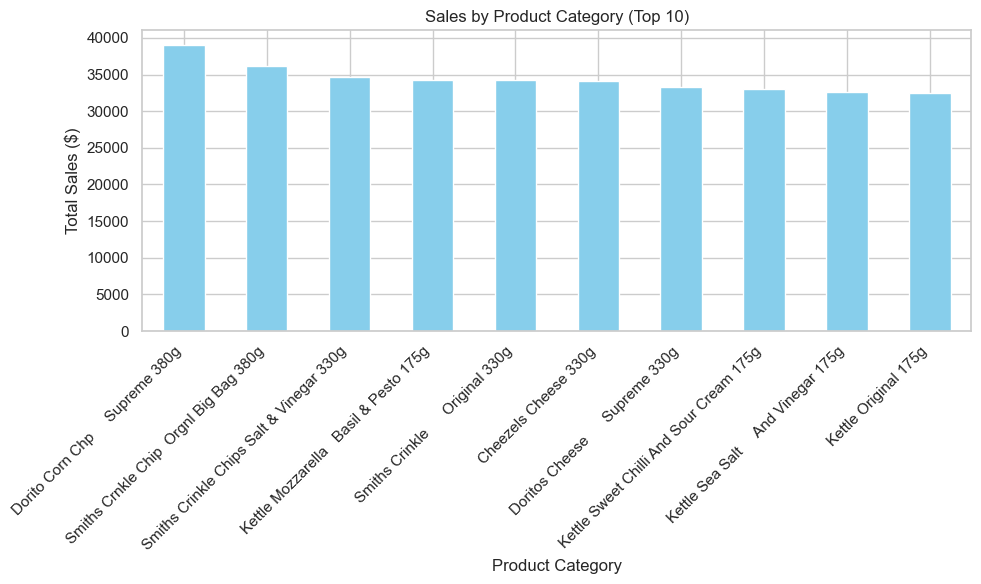

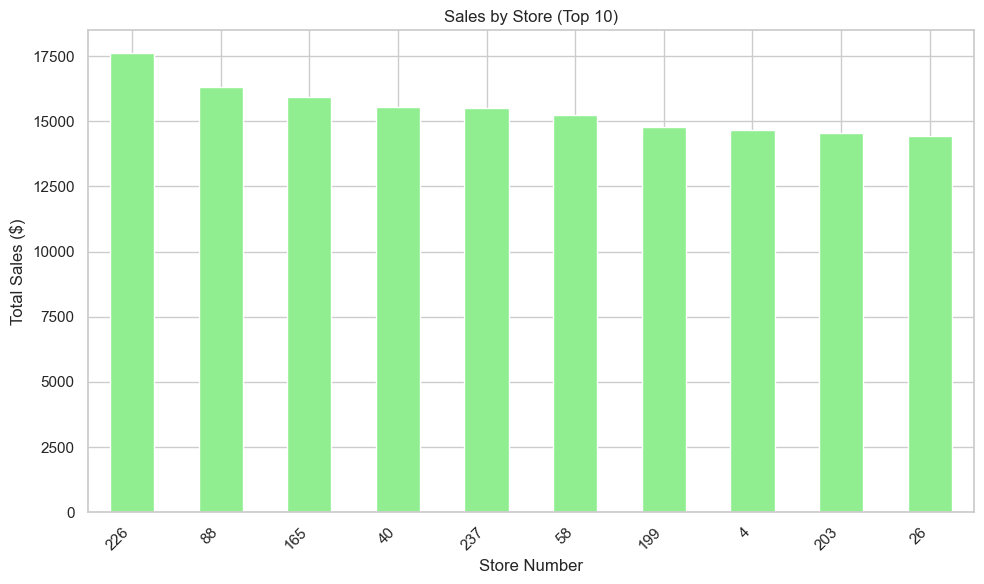

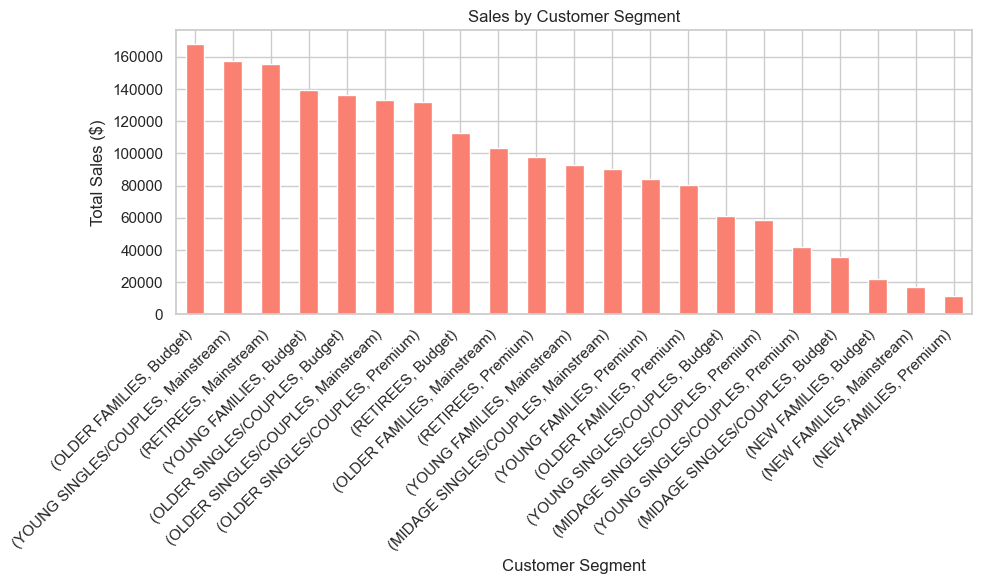

In [82]:
# Visualize Sales by Product Category (Top 10)
plt.figure(figsize=(10, 6))
sales_by_category.head(10).plot(kind='bar', color='skyblue')
plt.title('Sales by Product Category (Top 10)')
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize Sales by Store (Top 10)
plt.figure(figsize=(10, 6))
sales_by_store.head(10).plot(kind='bar', color='lightgreen')
plt.title('Sales by Store (Top 10)')
plt.xlabel('Store Number')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize Sales by Customer Segment
plt.figure(figsize=(10, 6))
sales_by_segment.plot(kind='bar', color='salmon')
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [83]:
# Round off sales figures to 2 decimals
sales_by_category_rounded = sales_by_category.round(2)
sales_by_segment_rounded = sales_by_segment.round(2)
sales_by_store_rounded = sales_by_store.round(2)

# Print rounded sales figures
print("Sales by Product Category (rounded to 2 decimals):")
print(sales_by_category_rounded.head())

print("\nSales by Customer Segment (rounded to 2 decimals):")
print(sales_by_segment_rounded.head())

print("\nSales by Store (rounded to 2 decimals):")
print(sales_by_store_rounded.head())


Sales by Product Category (rounded to 2 decimals):
PROD_NAME
Dorito Corn Chp     Supreme 380g            39067.75
Smiths Crnkle Chip  Orgnl Big Bag 380g      36205.40
Smiths Crinkle Chips Salt & Vinegar 330g    34719.50
Kettle Mozzarella   Basil & Pesto 175g      34291.20
Smiths Crinkle      Original 330g           34219.20
Name: TOT_SALES, dtype: float64

Sales by Customer Segment (rounded to 2 decimals):
LIFESTAGE              PREMIUM_CUSTOMER
OLDER FAMILIES         Budget              167991.15
YOUNG SINGLES/COUPLES  Mainstream          157410.20
RETIREES               Mainstream          155510.35
YOUNG FAMILIES         Budget              139109.20
OLDER SINGLES/COUPLES  Budget              136513.00
Name: TOT_SALES, dtype: float64

Sales by Store (rounded to 2 decimals):
STORE_NBR
226    17603.45
88     16312.35
165    15935.85
40     15544.20
237    15522.40
Name: TOT_SALES, dtype: float64


In [84]:
# Total Sales by Customer Segment
total_sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=False)
print("Total Sales by Customer Segment:")
print(total_sales_by_segment)

Total Sales by Customer Segment:
LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              167991.15
YOUNG SINGLES/COUPLES   Mainstream          157410.20
RETIREES                Mainstream          155510.35
YOUNG FAMILIES          Budget              139109.20
OLDER SINGLES/COUPLES   Budget              136513.00
                        Mainstream          133473.50
                        Premium             132011.25
RETIREES                Budget              112939.80
OLDER FAMILIES          Mainstream          103264.80
RETIREES                Premium              97484.40
YOUNG FAMILIES          Mainstream           92644.95
MIDAGE SINGLES/COUPLES  Mainstream           90627.10
YOUNG FAMILIES          Premium              83902.30
OLDER FAMILIES          Premium              80569.10
YOUNG SINGLES/COUPLES   Budget               61097.10
MIDAGE SINGLES/COUPLES  Premium              58338.25
YOUNG SINGLES/COUPLES   Premium              41624.70
MIDAGE S

In [87]:
# Average Transaction Size by Customer Segment
avg_transaction_size_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().sort_values(ascending=False)
print("\nAverage Transaction Size by Customer Segment:")
print(avg_transaction_size_by_segment)


Average Transaction Size by Customer Segment:
LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Mainstream          7.633041
YOUNG SINGLES/COUPLES   Mainstream          7.549650
RETIREES                Premium             7.444399
OLDER SINGLES/COUPLES   Premium             7.436835
RETIREES                Budget              7.431717
OLDER SINGLES/COUPLES   Budget              7.418378
NEW FAMILIES            Mainstream          7.311806
                        Budget              7.290166
YOUNG FAMILIES          Budget              7.275966
OLDER SINGLES/COUPLES   Mainstream          7.271779
YOUNG FAMILIES          Premium             7.256729
OLDER FAMILIES          Budget              7.255697
                        Mainstream          7.249705
RETIREES                Mainstream          7.245171
NEW FAMILIES            Premium             7.224858
OLDER FAMILIES          Premium             7.198812
YOUNG FAMILIES          Mainstream          7.178997
MIDAGE SING

In [88]:
# Purchase Frequency by Customer Segment
purchase_frequency_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).size().sort_values(ascending=False)
print("\nPurchase Frequency by Customer Segment:")
print(purchase_frequency_by_segment)


Purchase Frequency by Customer Segment:
LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Budget              23153
RETIREES                Mainstream          21464
YOUNG SINGLES/COUPLES   Mainstream          20850
YOUNG FAMILIES          Budget              19119
OLDER SINGLES/COUPLES   Budget              18402
                        Mainstream          18355
                        Premium             17751
RETIREES                Budget              15197
OLDER FAMILIES          Mainstream          14244
RETIREES                Premium             13095
YOUNG FAMILIES          Mainstream          12905
MIDAGE SINGLES/COUPLES  Mainstream          11873
YOUNG FAMILIES          Premium             11562
OLDER FAMILIES          Premium             11192
YOUNG SINGLES/COUPLES   Budget               9241
MIDAGE SINGLES/COUPLES  Premium              8214
YOUNG SINGLES/COUPLES   Premium              6281
MIDAGE SINGLES/COUPLES  Budget               5019
NEW FAMILIES      

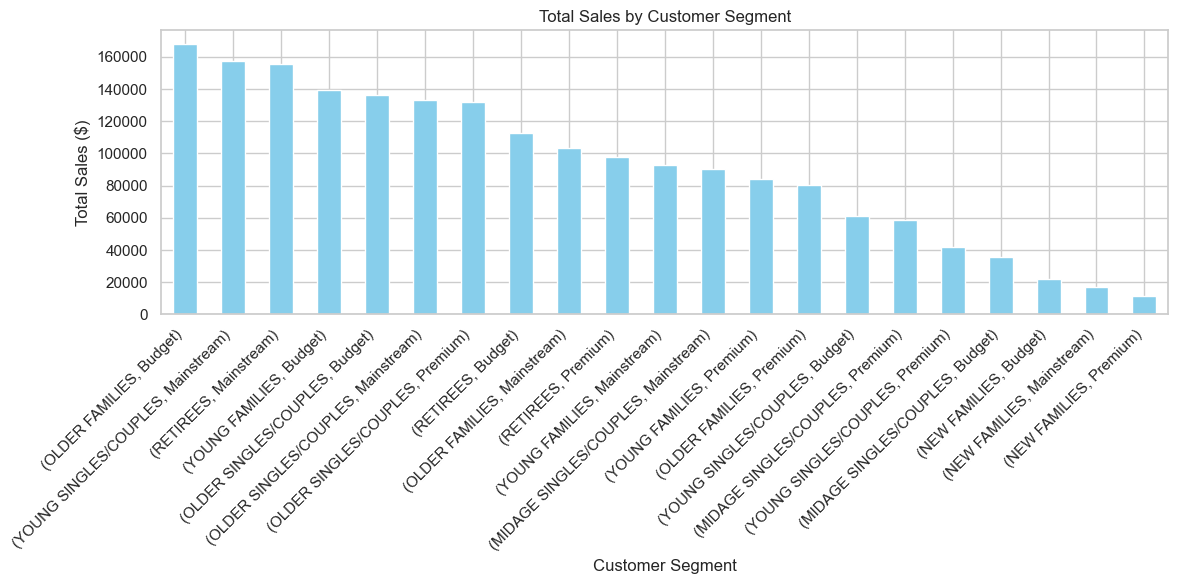

In [89]:
# Visualize Total Sales by Customer Segment
plt.figure(figsize=(12, 6))
total_sales_by_segment.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [92]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000.0,1.0,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307.0,348.0,66,CCs Nacho Cheese 175g,2,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343.0,383.0,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373.0,974.0,69,Smiths Chip Thinly S/Cream&Onion 175g,2,14.9,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426.0,1038.0,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,13.8,MIDAGE SINGLES/COUPLES,Budget


In [94]:
merged_data['STORE_NBR'].unique()

array([  1,   2,   4,   5,   7,   8,   9,  13,  19,  20,  22,  23,  25,
        33,  36,  38,  39,  41,  43,  45,  51,  54,  55,  56,  58,  59,
        60,  62,  63,  67,  71,  72,  74,  75,  80,  81,  82,  83,  84,
        88,  94,  96,  97, 101, 102, 104, 106, 109, 110, 111, 112, 114,
       115, 116, 118, 119, 120, 122, 125, 128, 129, 130, 133, 149, 151,
       152, 153, 156, 157, 160, 161, 164, 166, 167, 168, 169, 172, 173,
       175, 178, 181, 184, 186, 187, 191, 194, 196, 197, 200, 205, 207,
       208, 209, 212, 214, 215, 216, 217, 219, 222, 223, 225, 226, 227,
       235, 236, 237, 241, 243, 246, 247, 248, 250, 253, 255, 256, 257,
       262, 265, 266, 269, 271,  77,   3,   6,  10,  12,  15,  16,  17,
        18,  21,  24,  26,  27,  28,  29,  30,  32,  34,  35,  37,  40,
        46,  47,  48,  49,  50,  52,  53,  57,  61,  64,  65,  66,  68,
        69,  70,  73,  78,  79,  86,  87,  89,  90,  91,  93,  95,  98,
       100, 103, 105, 107, 108, 113, 117, 121, 123, 124, 126, 12

# TASK 2

In [102]:
data=pd.read_csv('QVI_data.csv')
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [103]:
# Filter data for trial stores (77, 86, and 88)
trial_stores_data = data[data['STORE_NBR'].isin([77, 86, 88])]

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [105]:
trial_stores_data['DATE'] = pd.to_datetime(trial_stores_data['DATE'])

C:\Users\manus\AppData\Local\Temp\ipykernel_16728\3031972442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_stores_data['DATE'] = pd.to_datetime(trial_stores_data['DATE'])


In [106]:
trial_stores_data

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
73365,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget
73366,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget
73367,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget
73368,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream
73369,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [117]:
# Group data by store and month, then calculate total sales revenue, total number of customers, and average transactions per customer
trial_store_metrics = trial_stores_data.groupby([pd.Grouper(key='DATE', freq='M'), 'STORE_NBR']).agg({
    'TOT_SALES': 'sum',
    'LYLTY_CARD_NBR': 'nunique',
    'TXN_ID': lambda x: x.nunique() / x.nunique()  # Average transactions per customer
}).reset_index()

In [120]:
# Rename the 'LYLTY_CARD_NBR' column to 'TOTAL_CUSTOMERS'
trial_store_metrics.rename(columns={'LYLTY_CARD_NBR': 'TOTAL_CUSTOMERS'}, inplace=True)

# Calculate average transactions per customer
trial_store_metrics['AVG_TRANSACTIONS_PER_CUSTOMER'] = trial_store_metrics['TXN_ID'] / trial_store_metrics['TOTAL_CUSTOMERS']

# Display the summary
print(trial_store_metrics)

         DATE  STORE_NBR  TOT_SALES  TOTAL_CUSTOMERS  TXN_ID  \
0  2018-07-31         77     296.80               51     1.0   
1  2018-07-31         86     892.20               99     1.0   
2  2018-07-31         88    1310.00              129     1.0   
3  2018-08-31         77     255.50               47     1.0   
4  2018-08-31         86     764.05               94     1.0   
5  2018-08-31         88    1323.80              131     1.0   
6  2018-09-30         77     225.20               42     1.0   
7  2018-09-30         86     914.60              103     1.0   
8  2018-09-30         88    1423.00              124     1.0   
9  2018-10-31         77     204.50               37     1.0   
10 2018-10-31         86     948.40              109     1.0   
11 2018-10-31         88    1352.40              123     1.0   
12 2018-11-30         77     245.30               41     1.0   
13 2018-11-30         86     918.00              100     1.0   
14 2018-11-30         88    1382.80     

In [121]:
trial_store_metrics

,DATE,STORE_NBR,TOT_SALES,TOTAL_CUSTOMERS,TXN_ID,AVG_TRANSACTIONS_PER_CUSTOMER
0,2018-07-31,77,296.80,51,1.0,0.019608
1,2018-07-31,86,892.20,99,1.0,0.010101
2,2018-07-31,88,1310.00,129,1.0,0.007752
3,2018-08-31,77,255.50,47,1.0,0.021277
4,2018-08-31,86,764.05,94,1.0,0.010638
5,2018-08-31,88,1323.80,131,1.0,0.007634
6,2018-09-30,77,225.20,42,1.0,0.023810
7,2018-09-30,86,914.60,103,1.0,0.009709
8,2018-09-30,88,1423.00,124,1.0,0.008065
9,2018-10-31,77,204.50,37,1.0,0.027027


In [127]:
import numpy as np
from scipy.stats import pearsonr

# Function to calculate Pearson correlation coefficient as similarity metric
def calculate_similarity(trial_store_data, control_stores_data):
    similarity_metrics = []
    for control_store_nbr, control_store_data in control_stores_data.groupby('STORE_NBR'):
        # Calculate Pearson correlation coefficient
        corr_coef, _ = pearsonr(trial_store_data['TOT_SALES'], control_store_data['TOT_SALES'])
        similarity_metrics.append({'Control_Store_Nbr': control_store_nbr, 'Similarity_Metric': corr_coef})
    return pd.DataFrame(similarity_metrics)

# Compare each trial store with control stores
for trial_store_nbr in trial_store_metrics['STORE_NBR'].unique():
    trial_store_data = trial_store_metrics[trial_store_metrics['STORE_NBR'] == trial_store_nbr]
    control_stores_data = trial_store_metrics[trial_store_metrics['STORE_NBR'] != trial_store_nbr]
    similarity_metrics = calculate_similarity(trial_store_data, control_stores_data)
    print(f"Similarity metrics for Trial Store {trial_store_nbr}:")
    print(similarity_metrics)
# These similarity metrics indicate how closely the sales performance of each trial store aligns with its corresponding control stores. Positive values indicate a positive correlation, while negative values indicate a negative correlation. A correlation coefficient closer to 1 or -1 indicates a stronger similarity.

Similarity metrics for Trial Store 77:
   Control_Store_Nbr  Similarity_Metric
0                 86          -0.012058
1                 88           0.065089
Similarity metrics for Trial Store 86:
   Control_Store_Nbr  Similarity_Metric
0                 77          -0.012058
1                 88           0.573811
Similarity metrics for Trial Store 88:
   Control_Store_Nbr  Similarity_Metric
0                 77           0.065089
1                 86           0.573811


In [126]:
trial_store_data

,DATE,STORE_NBR,TOT_SALES,TOTAL_CUSTOMERS,TXN_ID,AVG_TRANSACTIONS_PER_CUSTOMER
0,2018-07-31,77,296.8,51,1.0,0.019608
3,2018-08-31,77,255.5,47,1.0,0.021277
6,2018-09-30,77,225.2,42,1.0,0.023810
9,2018-10-31,77,204.5,37,1.0,0.027027
12,2018-11-30,77,245.3,41,1.0,0.024390
15,2018-12-31,77,267.3,46,1.0,0.021739
18,2019-01-31,77,204.4,35,1.0,0.028571
21,2019-02-28,77,235.0,45,1.0,0.022222
24,2019-03-31,77,278.5,50,1.0,0.020000
27,2019-04-30,77,263.5,47,1.0,0.021277


In [125]:
control_stores_data

,DATE,STORE_NBR,TOT_SALES,TOTAL_CUSTOMERS,TXN_ID,AVG_TRANSACTIONS_PER_CUSTOMER
0,2018-07-31,77,296.80,51,1.0,0.019608
1,2018-07-31,86,892.20,99,1.0,0.010101
3,2018-08-31,77,255.50,47,1.0,0.021277
4,2018-08-31,86,764.05,94,1.0,0.010638
6,2018-09-30,77,225.20,42,1.0,0.023810
7,2018-09-30,86,914.60,103,1.0,0.009709
9,2018-10-31,77,204.50,37,1.0,0.027027
10,2018-10-31,86,948.40,109,1.0,0.009174
12,2018-11-30,77,245.30,41,1.0,0.024390
13,2018-11-30,86,918.00,100,1.0,0.010000


In [ ]:
In summary, the trial store is where the intervention is implemented, while the control store provides a baseline for comparison. By comparing the performance metrics of the trial and control stores over a specific period, analysts can evaluate the effectiveness of the intervention and make data-driven decisions about whether to roll out the intervention to other stores.

In [124]:
control_store_nbrs = control_store_mapping[trial_store_nbr]


NameError: name 'control_store_mapping' is not defined

In [128]:
control_store_mapping = {
    77: [86, 88],  # Trial store 77 is mapped to control stores 86 and 88
    86: [77, 88],  # Trial store 86 is mapped to control stores 77 and 88
    88: [77, 86]   # Trial store 88 is mapped to control stores 77 and 86
}

In [129]:
#To compare the trial and control pairs during the trial period and determine if total sales are significantly different, we can conduct a hypothesis test. We'll use a paired t-test to compare the mean total sales between each trial store and its corresponding control stores during the trial period.

control_store_nbrs = control_store_mapping[trial_store_nbr]


from scipy.stats import ttest_rel

# Define significance level
alpha = 0.05

# Perform paired t-test for each trial-control pair
for trial_store_nbr in trial_store_metrics['STORE_NBR'].unique():
    trial_store_data = trial_store_metrics[trial_store_metrics['STORE_NBR'] == trial_store_nbr]
    control_store_nbrs = control_store_mapping[trial_store_nbr]
    for control_store_nbr in control_store_nbrs:
        control_store_data = trial_store_metrics[trial_store_metrics['STORE_NBR'] == control_store_nbr]
        # Perform paired t-test
        t_stat, p_value = ttest_rel(trial_store_data['TOT_SALES'], control_store_data['TOT_SALES'])
        if p_value < alpha:
            print(f"Trial Store {trial_store_nbr} and Control Store {control_store_nbr}:")
            print("Null hypothesis rejected. There is a significant difference in mean total sales.")
            print(f"P-value: {p_value}")
        else:
            print(f"Trial Store {trial_store_nbr} and Control Store {control_store_nbr}:")
            print("Null hypothesis not rejected. There is no significant difference in mean total sales.")
            print(f"P-value: {p_value}")


Trial Store 77 and Control Store 86:
Null hypothesis rejected. There is a significant difference in mean total sales.
P-value: 7.849823517533485e-12
Trial Store 77 and Control Store 88:
Null hypothesis rejected. There is a significant difference in mean total sales.
P-value: 5.708255021793347e-15
Trial Store 86 and Control Store 77:
Null hypothesis rejected. There is a significant difference in mean total sales.
P-value: 7.849823517533485e-12
Trial Store 86 and Control Store 88:
Null hypothesis rejected. There is a significant difference in mean total sales.
P-value: 1.5451711084162013e-11
Trial Store 88 and Control Store 77:
Null hypothesis rejected. There is a significant difference in mean total sales.
P-value: 5.708255021793347e-15
Trial Store 88 and Control Store 86:
Null hypothesis rejected. There is a significant difference in mean total sales.
P-value: 1.5451711084162013e-11


The output shows that the null hypothesis is rejected for all trial-control store pairs, indicating a significant difference in mean total sales during the trial period. The p-values are extremely small, suggesting strong evidence against the null hypothesis.
H0:μ(trial) =μ(control)


In [ ]:
μ(trial): represents the population mean of total sales for the trial store during the trial period.
�
μ(control): represents the population mean of total sales for the corresponding control store during the same period.

In [133]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming you have the necessary data loaded into dataframes named trial_store_data and control_store_data

# 1. Calculate Customer Behavior Metrics

# Trial Store Metrics
trial_store_total_customers = trial_store_data.groupby('DATE')['LYLTY_CARD_NBR'].nunique().sum()
trial_store_total_transactions = trial_store_data['TXN_ID'].nunique()
trial_store_avg_transactions_per_customer = trial_store_total_transactions / trial_store_total_customers
trial_store_avg_transaction_size = trial_store_data['TOT_SALES'].sum() / trial_store_total_transactions

# Control Store Metrics (assuming control stores are in a list named control_stores)
control_stores_total_customers = []
control_stores_total_transactions = []
control_stores_avg_transactions_per_customer = []
control_stores_avg_transaction_size = []

for control_store_nbr in control_stores:
    control_store_data = control_store_data[control_store_data['STORE_NBR'] == control_store_nbr]
    total_customers = control_store_data.groupby('DATE')['LYLTY_CARD_NBR'].nunique().sum()
    total_transactions = control_store_data['TXN_ID'].nunique()
    avg_transactions_per_customer = total_transactions / total_customers
    avg_transaction_size = control_store_data['TOT_SALES'].sum() / total_transactions
    
    control_stores_total_customers.append(total_customers)
    control_stores_total_transactions.append(total_transactions)
    control_stores_avg_transactions_per_customer.append(avg_transactions_per_customer)
    control_stores_avg_transaction_size.append(avg_transaction_size)

# 2. Conduct Statistical Tests

# Perform t-tests for each metric
t_stat_total_customers, p_value_total_customers = ttest_ind(trial_store_total_customers, control_stores_total_customers)
t_stat_avg_transactions_per_customer, p_value_avg_transactions_per_customer = ttest_ind(trial_store_avg_transactions_per_customer, control_stores_avg_transactions_per_customer)
t_stat_avg_transaction_size, p_value_avg_transaction_size = ttest_ind(trial_store_avg_transaction_size, control_stores_avg_transaction_size)

# Print the results
print("Total Customers:")
print("  T-Statistic:", t_stat_total_customers)
print("  P-Value:", p_value_total_customers)
print()
print("Average Transactions per Customer:")
print("  T-Statistic:", t_stat_avg_transactions_per_customer)
print("  P-Value:", p_value_avg_transactions_per_customer)
print()
print("Average Transaction Size:")
print("  T-Statistic:", t_stat_avg_transaction_size)
print("  P-Value:", p_value_avg_transaction_size)


KeyError: 'Column not found: LYLTY_CARD_NBR'

In [131]:
print(trial_store_data.columns)


Index(['DATE', 'STORE_NBR', 'TOT_SALES', 'TOTAL_CUSTOMERS', 'TXN_ID',
       'AVG_TRANSACTIONS_PER_CUSTOMER'],
      dtype='object')


In [132]:
trial_store_total_customers = trial_store_data['TOTAL_CUSTOMERS'].sum()
trial_store_total_transactions = trial_store_data['TXN_ID'].nunique()
trial_store_avg_transactions_per_customer = trial_store_total_transactions / trial_store_total_customers


In [ ]:
trial_store_total_customers = trial_store_data['TOTAL_CUSTOMERS'].sum()
trial_store_total_transactions = trial_store_data['TXN_ID'].nunique()
trial_store_avg_transactions_per_customer = trial_store_total_transactions / trial_store_total_customers


In [134]:
from scipy.stats import ttest_rel

# Define significance level
alpha = 0.05

# Perform paired t-test for each trial-control pair
for trial_store_nbr in trial_store_metrics['STORE_NBR'].unique():
    trial_store_data = trial_store_metrics[trial_store_metrics['STORE_NBR'] == trial_store_nbr]
    control_store_nbrs = control_store_mapping[trial_store_nbr]
    for control_store_nbr in control_store_nbrs:
        control_store_data = trial_store_metrics[trial_store_metrics['STORE_NBR'] == control_store_nbr]
        # Perform paired t-test
        t_stat, p_value = ttest_rel(trial_store_data['TOT_SALES'], control_store_data['TOT_SALES'])
        if p_value < alpha:
            print(f"Trial Store {trial_store_nbr} and Control Store {control_store_nbr}:")
            print("Null hypothesis rejected. There is a significant difference in mean total sales.")
            print(f"P-value: {p_value}")
        else:
            print(f"Trial Store {trial_store_nbr} and Control Store {control_store_nbr}:")
            print("Null hypothesis not rejected. There is no significant difference in mean total sales.")
            print(f"P-value: {p_value}")


Trial Store 77 and Control Store 86:
Null hypothesis rejected. There is a significant difference in mean total sales.
P-value: 7.849823517533485e-12
Trial Store 77 and Control Store 88:
Null hypothesis rejected. There is a significant difference in mean total sales.
P-value: 5.708255021793347e-15
Trial Store 86 and Control Store 77:
Null hypothesis rejected. There is a significant difference in mean total sales.
P-value: 7.849823517533485e-12
Trial Store 86 and Control Store 88:
Null hypothesis rejected. There is a significant difference in mean total sales.
P-value: 1.5451711084162013e-11
Trial Store 88 and Control Store 77:
Null hypothesis rejected. There is a significant difference in mean total sales.
P-value: 5.708255021793347e-15
Trial Store 88 and Control Store 86:
Null hypothesis rejected. There is a significant difference in mean total sales.
P-value: 1.5451711084162013e-11
